In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

In [129]:
all_tiff_files = []
listOfFiles = os.listdir('./clean_data/obj_test_res')
pattern = "*.tiff"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            all_tiff_files.append('./clean_data/obj_test_res/'+entry)

In [105]:
print(len(all_tiff_files))

42165


In [106]:
images_list = []
half_size = int(len(all_tiff_files) / 2)
max_size = 0
max_width = 0
max_height = 0
ind = 0
for i in range(half_size):
#    if(i == 25232):
#        print(all_tiff_files[i])
    im = Image.open(all_tiff_files[i])
    arr = np.array(im)#.flatten()
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list.append(arr)

for i in range(half_size, len(all_tiff_files)):
#    if(i == 25232):
#        print(all_tiff_files[i])
    im = Image.open(all_tiff_files[i])
    arr = np.array(im)#.flatten()
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list.append(arr)   

In [107]:
print(max_width, max_height, ind)

27 140 7748


In [108]:
for i in range(len(images_list)):
    s = images_list[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list[i] = arr
    
    #if i == 1024:
    #    plt.imshow(arr)
    

In [109]:
width = max_width
height = max_height
print(width, height)

27 140


In [110]:
for i in range(len(images_list)):
    images_list[i] = images_list[i].flatten()

In [111]:
images_np = np.array(images_list)

In [112]:
images_np.shape

(42165, 3780)

In [113]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(images_np)
X_train_minmax.shape

(42165, 3780)

In [114]:
from sklearn.decomposition import PCA
pca = PCA(.98)
principalComponents = pca.fit_transform(X_train_minmax)

In [115]:
principalComponents.shape

(42165, 866)

In [132]:
X_train, X_test = train_test_split(principalComponents, test_size=0.2, random_state=100)

array([-8.64270104e-01, -1.37873725e+00,  2.74400939e-01,  1.59450394e-01,
       -1.11682812e-01,  5.97243506e-01, -1.44577040e-01, -5.73569095e-02,
       -2.57951152e-01, -2.40288490e-01, -3.69254567e-01,  3.84244905e-01,
       -8.00756950e-02, -1.10574115e-01, -3.03946720e-01, -3.08027460e-01,
       -9.56319739e-02,  1.22000764e-01,  3.36373285e-03,  1.26696868e-01,
       -5.96999165e-02, -3.72730879e-02, -1.17719294e-01, -1.48231696e-01,
        1.78319570e-01, -9.87903330e-02, -6.10334303e-02, -2.21081459e-01,
       -1.66414557e-01,  3.49963522e-02,  9.37072828e-02, -1.34543421e-02,
       -6.84809368e-02,  8.07474439e-02,  7.38459402e-03,  6.51424745e-02,
        2.25555010e-01,  7.36241084e-02,  5.94132674e-02,  5.38672726e-03,
        2.66311004e-02,  1.09297413e-01, -5.84446799e-03,  1.41361044e-01,
        6.03357546e-02,  1.42690537e-01,  4.13125518e-02,  1.37248116e-02,
        1.06080396e-02,  1.30937121e-01,  5.71492959e-02, -6.70775734e-02,
        5.14071645e-02,  

In [117]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13370839485828891019
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1441641267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1900635357411152402
physical_device_desc: "device: 0, name: GeForce GTX 750 Ti, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [118]:
inpu_dim = principalComponents.shape[1]
print(inpu_dim)
h_1 = 128
h_2 = 64
hidden_dim = 32
encoding_dim = 4

866


In [119]:
input_vect = Input(shape = (inpu_dim,))
x = BatchNormalization()(input_vect)
x = Dense(h_1, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dense(h_2, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dense(hidden_dim, activation="relu")(x)
x = BatchNormalization()(x)
encoded = Dense(encoding_dim, activation="relu")(x)

x = BatchNormalization()(encoded)
#x = Dense(hidden_dim, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dense(h_2, activation="relu")(x)
#x = BatchNormalization()(x)
x = Dense(h_1, activation="relu")(x)
x = BatchNormalization()(x)
decoded = Dense(inpu_dim, activation="relu")(x)

autoencoder = Model(input_vect, decoded)
encoder = Model(input_vect, encoded)

In [120]:
adadelta = optimizers.Adadelta(lr=0.9, rho=0.95)

In [121]:
autoencoder.compile(optimizer=adadelta, loss = "MSE",metrics=['mean_squared_error'])

In [122]:
history = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 1024, shuffle=True, validation_data=(X_test, X_test))

Train on 33732 samples, validate on 8433 samples
Epoch 1/100
33732/33732 [==============================] - 2s 62us/step - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 3/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 4/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 5/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 6/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0129 - mean_squared_error: 0.

33732/33732 [==============================] - 1s 28us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 50/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 51/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 52/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 53/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 54/100
33732/33732 [==============================] - 1s 29us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0092 - val_mean_squared_error: 0.0092

33732/33732 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 98/100
33732/33732 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 99/100
33732/33732 [==============================] - 1s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 100/100
33732/33732 [==============================] - 1s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0084 - val_mean_squared_error: 0.0084


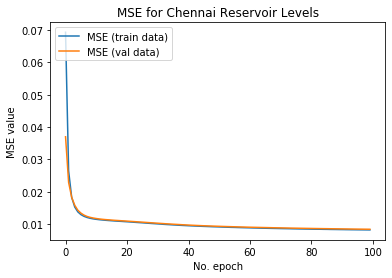

In [123]:
plt.plot(history.history['mean_squared_error'], label='MSE (train data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [138]:
encoded_values = autoencoder.predict(X_test)

In [139]:
encoded_values.shape

(8433, 866)

In [125]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(encoded_values)

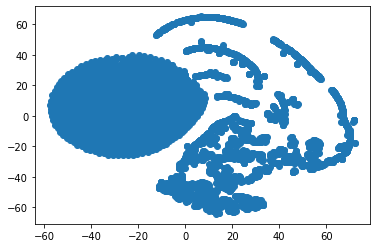

In [126]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

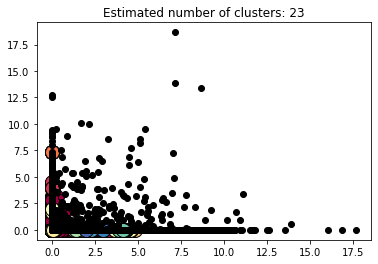

In [127]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X = encoded_values
db = DBSCAN(eps=0.3, min_samples=5).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()